# Assignment 3 - Model Interpretability

### Data Cleaning and Preprocessing

In [1]:
#installing dependencies
#!pip install eli5
%matplotlib inline
import pandas as pd #library for data analysis
import numpy as np #numerical python library to perform scientific calculations
import seaborn as sns #library for statistical plotting
import matplotlib.pyplot as plt
import math #to perform math functions

StressandSleep = pd.read_csv('https://raw.githubusercontent.com/Divi1393/barathwaaj_diviya_2445921_DSEM_Assignments/main/ML%20Data%20Cleaning%20and%20Feature%20Selection/SleepQuality.csv') #read the data file
StressandSleep.head(10) #display the first 10 enteries of the dataset to check the column enteries and names

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [2]:
# Find the data types of each column
data_types = StressandSleep.dtypes

# Separate columns into numerical and categorical. .
numerical_columns = data_types[data_types != 'object'].index
categorical_columns = data_types[data_types == 'object'].index

# Display the number of numerical and categorical columns
print(f"Number of Numerical Columns: {len(numerical_columns)}")
print(f"Number of Categorical Columns: {len(categorical_columns)}")

# Display the list of numerical and categorical columns
print("\nNumerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Number of Numerical Columns: 8
Number of Categorical Columns: 5

Numerical Columns:
Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')

Categorical Columns:
Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object')


In [3]:
StressandSleep.info() #Understand the dataset that we re working with-provides info0rmation about the dataframe such as data types of each column, number of null values and the memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
null_values = StressandSleep.isnull().sum() #check for null values
print("Null Values in each column:\n", null_values) #Displaying the result

Null Values in each column:
 Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [5]:
#Checking for unique varibales in categorical columns
StressandSleep[categorical_columns].nunique()

Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     2
dtype: int64

In [6]:
StressandSleep['Occupation'].value_counts() 

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [7]:
StressandSleep['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

Sleep disorder is a categorical variable as it represents distinct classes such as "None," "Insomnia," or "Sleep Apnea." Categorizing sleep disorders is based on qualitative distinctions, making it inappropriate to impute missing values using mode imputation, which relies on the most frequent category. Imputing sleep disorder based on mode would oversimplify the complexity of sleep conditions, potentially leading to inaccurate representations of individuals' actual sleep-related challenges. Hence removing sleep disorder column.

In [8]:
df1=StressandSleep.drop(columns=['Sleep Disorder'])
df1.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps'],
      dtype='object')

In [9]:
#Checking for null values again
df1.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
dtype: int64

In [10]:
df1.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000


In [11]:
df1['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [12]:
df2 = pd.concat([df1, df1['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df2

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,0,1
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95


In [13]:
df2= df2.rename(columns={0: 'BloodPressure_Upper_Value', 1: 'BloodPressure_Lower_Value'})
df2.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,BloodPressure_Upper_Value,BloodPressure_Lower_Value
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90


In [14]:
#One Hot Encoding of Categorical Columns

# Perform one-hot encoding using pandas get_dummies
df3 = pd.get_dummies(df2, columns=['Gender', 'Occupation', 'BMI Category'])

# Display the first few rows of the encoded DataFrame
print(df3.head())

   Person ID  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0          1   27             6.1                 6                       42   
1          2   28             6.2                 6                       60   
2          3   28             6.2                 6                       60   
3          4   28             5.9                 4                       30   
4          5   28             5.9                 4                       30   

   Stress Level  Heart Rate  Daily Steps BloodPressure_Upper_Value  \
0             6          77         4200                       126   
1             8          75        10000                       125   
2             8          75        10000                       125   
3             8          85         3000                       140   
4             8          85         3000                       140   

  BloodPressure_Lower_Value  ...  Occupation_Nurse  \
0                        83  ...            

In [15]:
df3.dtypes

Person ID                            int64
Age                                  int64
Sleep Duration                     float64
Quality of Sleep                     int64
Physical Activity Level              int64
Stress Level                         int64
Heart Rate                           int64
Daily Steps                          int64
BloodPressure_Upper_Value           object
BloodPressure_Lower_Value           object
Gender_Female                         bool
Gender_Male                           bool
Occupation_Accountant                 bool
Occupation_Doctor                     bool
Occupation_Engineer                   bool
Occupation_Lawyer                     bool
Occupation_Manager                    bool
Occupation_Nurse                      bool
Occupation_Sales Representative       bool
Occupation_Salesperson                bool
Occupation_Scientist                  bool
Occupation_Software Engineer          bool
Occupation_Teacher                    bool
BMI Categor

In [16]:
df3['BloodPressure_Upper_Value'] = pd.to_numeric(df3['BloodPressure_Upper_Value'], errors='coerce')
df3['BloodPressure_Lower_Value'] = pd.to_numeric(df3['BloodPressure_Lower_Value'], errors='coerce')


In [17]:
df3.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BloodPressure_Upper_Value,BloodPressure_Lower_Value,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1,27,6.1,6,42,6,77,4200,126,83,...,False,False,False,False,True,False,False,False,False,True
1,2,28,6.2,6,60,8,75,10000,125,80,...,False,False,False,False,False,False,True,False,False,False
2,3,28,6.2,6,60,8,75,10000,125,80,...,False,False,False,False,False,False,True,False,False,False
3,4,28,5.9,4,30,8,85,3000,140,90,...,False,True,False,False,False,False,False,False,True,False
4,5,28,5.9,4,30,8,85,3000,140,90,...,False,True,False,False,False,False,False,False,True,False


In [18]:
df3.dtypes

Person ID                            int64
Age                                  int64
Sleep Duration                     float64
Quality of Sleep                     int64
Physical Activity Level              int64
Stress Level                         int64
Heart Rate                           int64
Daily Steps                          int64
BloodPressure_Upper_Value            int64
BloodPressure_Lower_Value            int64
Gender_Female                         bool
Gender_Male                           bool
Occupation_Accountant                 bool
Occupation_Doctor                     bool
Occupation_Engineer                   bool
Occupation_Lawyer                     bool
Occupation_Manager                    bool
Occupation_Nurse                      bool
Occupation_Sales Representative       bool
Occupation_Salesperson                bool
Occupation_Scientist                  bool
Occupation_Software Engineer          bool
Occupation_Teacher                    bool
BMI Categor

There are no null or missing values in our data. So we can remove some data and perform imputation. The imputation method is chosen based on the data type of each column. For numeric columns (float64 and int64), it uses mean or median. Because and for object or categorical columns, it uses the mode.

In [19]:
# 'original_df' is original DataFrame
original_df = pd.DataFrame(df3)

# Create a copy of the original DataFrame
imputed_df = original_df.copy()

# Impute missing values randomly based on mean, median, or mode
for column in imputed_df.columns:
    # Generate random indices for missing values
    random_indices = imputed_df[column].isnull()

    # Impute based on mean, median, or mode
    if imputed_df[column].dtype == 'float64':
        imputed_values = imputed_df[column].mean()
    elif imputed_df[column].dtype == 'int64':
        imputed_values = imputed_df[column].median()
    else:
        imputed_values = imputed_df[column].mode().iloc[0]

    # Replace missing values with imputed values
    imputed_df.loc[random_indices, column] = imputed_values

# Display the original and imputed DataFrames
print("Original DataFrame:")
print(original_df)
print("\nImputed DataFrame:")
print(imputed_df)

Original DataFrame:
     Person ID  Age  Sleep Duration  Quality of Sleep  \
0            1   27             6.1                 6   
1            2   28             6.2                 6   
2            3   28             6.2                 6   
3            4   28             5.9                 4   
4            5   28             5.9                 4   
..         ...  ...             ...               ...   
369        370   59             8.1                 9   
370        371   59             8.0                 9   
371        372   59             8.1                 9   
372        373   59             8.1                 9   
373        374   59             8.1                 9   

     Physical Activity Level  Stress Level  Heart Rate  Daily Steps  \
0                         42             6          77         4200   
1                         60             8          75        10000   
2                         60             8          75        10000   
3          

/var/folders/_5/8gxwk_ms6js9pvyn9yd_fx780000gn/T/ipykernel_64289/3812684908.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '187.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  imputed_df.loc[random_indices, column] = imputed_values


In [20]:
imputed_df.head(10)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BloodPressure_Upper_Value,BloodPressure_Lower_Value,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1.0,27,6.1,6,42,6,77,4200,126,83,...,False,False,False,False,True,False,False,False,False,True
1,2.0,28,6.2,6,60,8,75,10000,125,80,...,False,False,False,False,False,False,True,False,False,False
2,3.0,28,6.2,6,60,8,75,10000,125,80,...,False,False,False,False,False,False,True,False,False,False
3,4.0,28,5.9,4,30,8,85,3000,140,90,...,False,True,False,False,False,False,False,False,True,False
4,5.0,28,5.9,4,30,8,85,3000,140,90,...,False,True,False,False,False,False,False,False,True,False
5,6.0,28,5.9,4,30,8,85,3000,140,90,...,False,False,False,False,True,False,False,False,True,False
6,7.0,29,6.3,6,40,7,82,3500,140,90,...,False,False,False,False,False,True,False,False,True,False
7,8.0,29,7.8,7,75,6,70,8000,120,80,...,False,False,False,False,False,False,True,False,False,False
8,9.0,29,7.8,7,75,6,70,8000,120,80,...,False,False,False,False,False,False,True,False,False,False
9,10.0,29,7.8,7,75,6,70,8000,120,80,...,False,False,False,False,False,False,True,False,False,False


In [21]:
df4=imputed_df
df4.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BloodPressure_Upper_Value,BloodPressure_Lower_Value,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1.0,27,6.1,6,42,6,77,4200,126,83,...,False,False,False,False,True,False,False,False,False,True
1,2.0,28,6.2,6,60,8,75,10000,125,80,...,False,False,False,False,False,False,True,False,False,False
2,3.0,28,6.2,6,60,8,75,10000,125,80,...,False,False,False,False,False,False,True,False,False,False
3,4.0,28,5.9,4,30,8,85,3000,140,90,...,False,True,False,False,False,False,False,False,True,False
4,5.0,28,5.9,4,30,8,85,3000,140,90,...,False,True,False,False,False,False,False,False,True,False


In [22]:
df4.to_csv('assignment3.csv', index=False)

### QUESTION 1: Fit a linear model and interpret the regression coefficients

Given the "Quality of Sleep" variable is categorical with more than two outcomes, we can't use binary logistic regression directly. Instead, multinomial logistic regression, an extension of binary logistic regression, is suitable for handling multiple classes. This model provides a way to predict probabilities of the different possible outcomes of a categorically distributed dependent variable, given a set of independent variables.

Model Fitting and Interpretation
In fitting a multinomial logistic regression model to predict "Quality of Sleep", we estimate coefficients for each class relative to a baseline class. These coefficients indicate the change in the log odds of being in a given category versus the baseline category, for a one-unit increase in the predictor variable.

Through multinomial logistic regression, we can understand how different factors influence the "Quality of Sleep". By interpreting the coefficients, we gain insights into which factors are likely to improve or worsen sleep quality, guiding interventions or recommendations to enhance sleep health. This approach allows for a nuanced analysis of the predictors of "Quality of Sleep" across its various categories, providing a comprehensive view of the factors at play.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import shap
import numpy as np

# Define features (X) and target variable (y)
X = df4.drop(['Person ID', 'Quality of Sleep'], axis=1)
y = df4['Quality of Sleep']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that includes scaling and logistic regression model
logreg_pipeline = make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000))

# Fit the model on the training data
logreg_pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

# Print the evaluation results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Accuracy: 0.9466666666666667

Confusion Matrix:
 [[ 1  0  1  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1 25  0  0  0]
 [ 0  0  0 14  1  1]
 [ 0  0  0  0 18  0]
 [ 0  0  0  0  0 12]]

Classification Report:
               precision    recall  f1-score   support

           4       1.00      0.50      0.67         2
           5       0.50      1.00      0.67         1
           6       0.96      0.96      0.96        26
           7       1.00      0.88      0.93        16
           8       0.95      1.00      0.97        18
           9       0.92      1.00      0.96        12

    accuracy                           0.95        75
   macro avg       0.89      0.89      0.86        75
weighted avg       0.96      0.95      0.95        75



In [24]:
# Extract and view the coefficients from the model within the pipeline
logreg_model = logreg_pipeline.named_steps['logisticregression']
coefficients = logreg_model.coef_
intercepts = logreg_model.intercept_

# Feature names, aligning with the columns in X_train
feature_names = X_train.columns

# Create a DataFrame for easier viewing
coef_df = pd.DataFrame(coefficients, columns=feature_names)
coef_df['intercept'] = intercepts

# Add class/label names if you have them
class_labels = logreg_model.classes_
coef_df.index = [f'Class {label}' for label in class_labels]

# Print the coefficients and intercepts for each class
print("\nCoefficients and Intercept:")
print(coef_df)


Coefficients and Intercept:
              Age  Sleep Duration  Physical Activity Level  Stress Level  \
Class 4  0.022332       -0.460604                -0.714129      0.906311   
Class 5 -0.762238       -0.252283                -0.568368      0.453699   
Class 6  0.099874       -1.852211                -0.138833      1.498793   
Class 7  0.085323        0.563101                 0.005928     -0.073077   
Class 8 -0.605692        0.074367                 0.771129     -0.971796   
Class 9  1.160402        1.927630                 0.644273     -1.813931   

         Heart Rate  Daily Steps  BloodPressure_Upper_Value  \
Class 4    1.017214    -0.151665                   0.290219   
Class 5    0.565541    -0.738230                   0.244394   
Class 6   -0.015327     0.460987                  -0.268933   
Class 7   -0.745451    -0.198603                  -0.186854   
Class 8   -0.189297     0.714718                  -0.177095   
Class 9   -0.632680    -0.087206                   0.098268 

General Interpretation: 
Positive coefficients indicate an increase in the predictor leads to an increase in the log odds of being in the respective class compared to the baseline, translating to a higher probability of being in that class.
Negative coefficients suggest an increase in the predictor leads to a decrease in the log odds of being in the respective class, meaning a lower probability of being in that class.
These coefficients help understand the factors that are associated with different levels of sleep quality. For instance, longer sleep duration and higher physical activity levels are generally associated with better sleep quality classes, while higher stress levels may decrease sleep quality. 

Age
Positive Coefficients (e.g., Class 9: 1.160402) suggest that older individuals are more likely to have a higher quality of sleep within these specific classes.
Negative Coefficients (e.g., Class 5: -0.762238) indicate that younger individuals are more likely to fall into these categories, compared to the baseline.

Sleep Duration
A strong negative coefficient in Class 6 (-1.852211) suggests that shorter sleep durations significantly decrease the log odds of being in this high sleep quality class.
Positive coefficients (e.g., Class 9: 1.927630) imply that longer sleep durations are associated with higher sleep quality in these classes.

Physical Activity Level
Positive coefficients (e.g., Class 9: 0.644273) indicate that higher levels of physical activity are associated with higher odds of being in these categories of sleep quality.
Negative coefficients reflect the opposite.

Interpreting the intercept:

The intercept is the expected value of the dependent variable when all independent variables are set to zero.
It can be thought of as the base rate of the class when all other factors are absent.

example, in Class 4:
Age has a positive coefficient, meaning that as age increases, the likelihood of belonging to Class 4 increases.
Sleep Duration has a negative coefficient, suggesting that longer sleep durations are associated with a lower likelihood of belonging to Class 4.
The intercept is -5.161151, which is the expected value of the dependent variable when all predictor variables are zero.
You can use these coefficients and intercepts to predict the class membership for new observations based on their feature values.

In [25]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


Shape of SHAP values: (75, 25, 6)


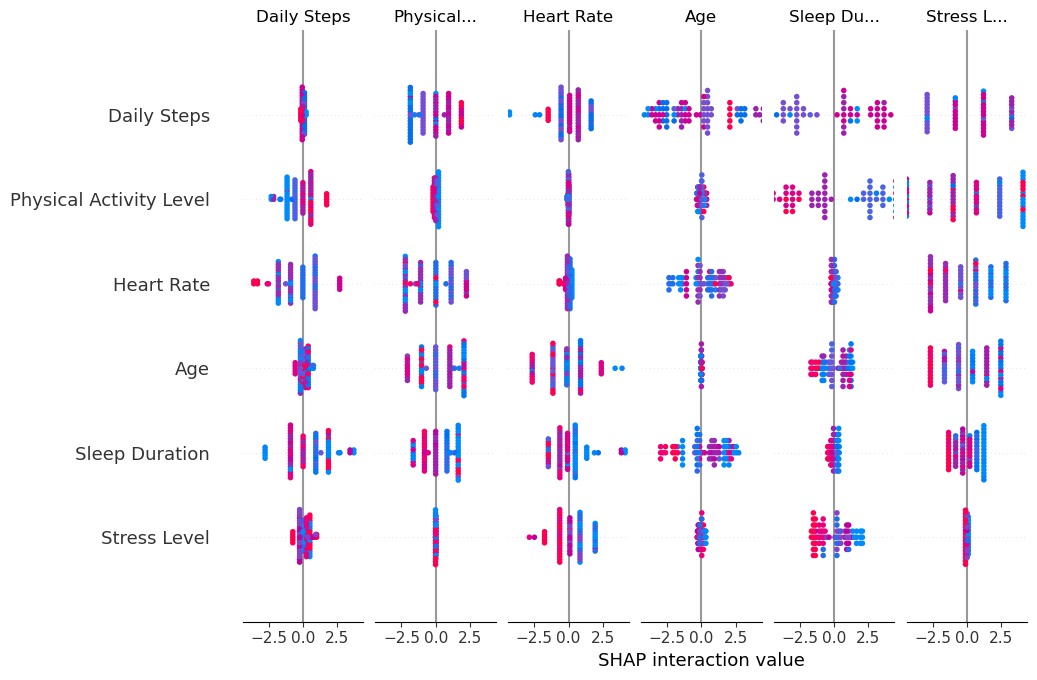

Class 0:


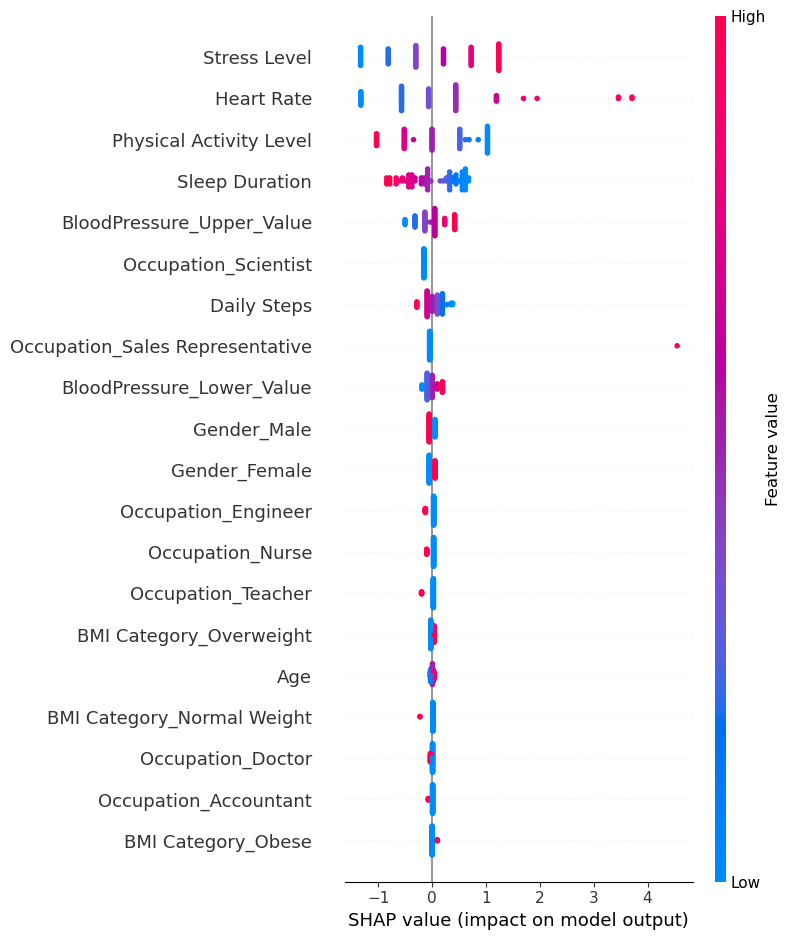

Class 1:


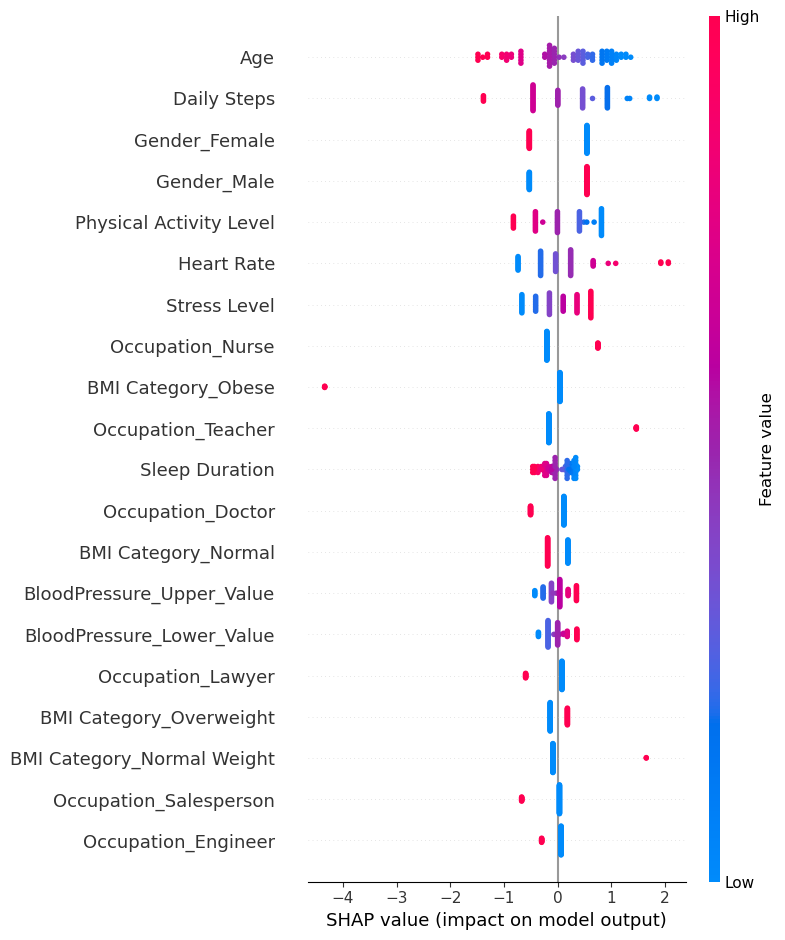

Class 2:


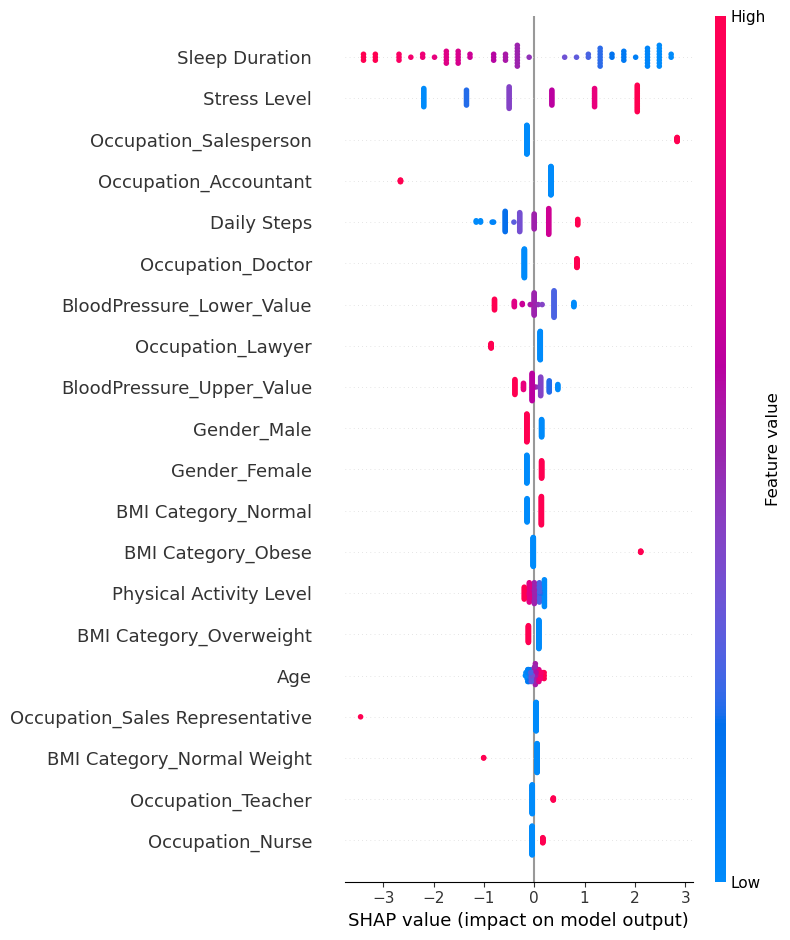

Class 3:


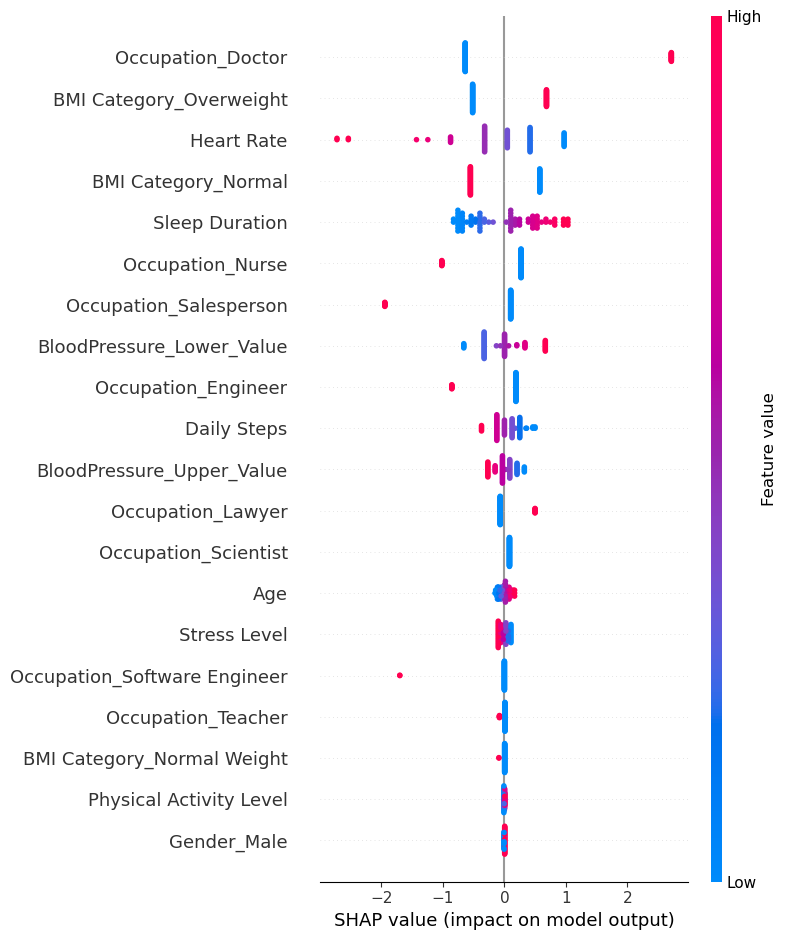

Class 4:


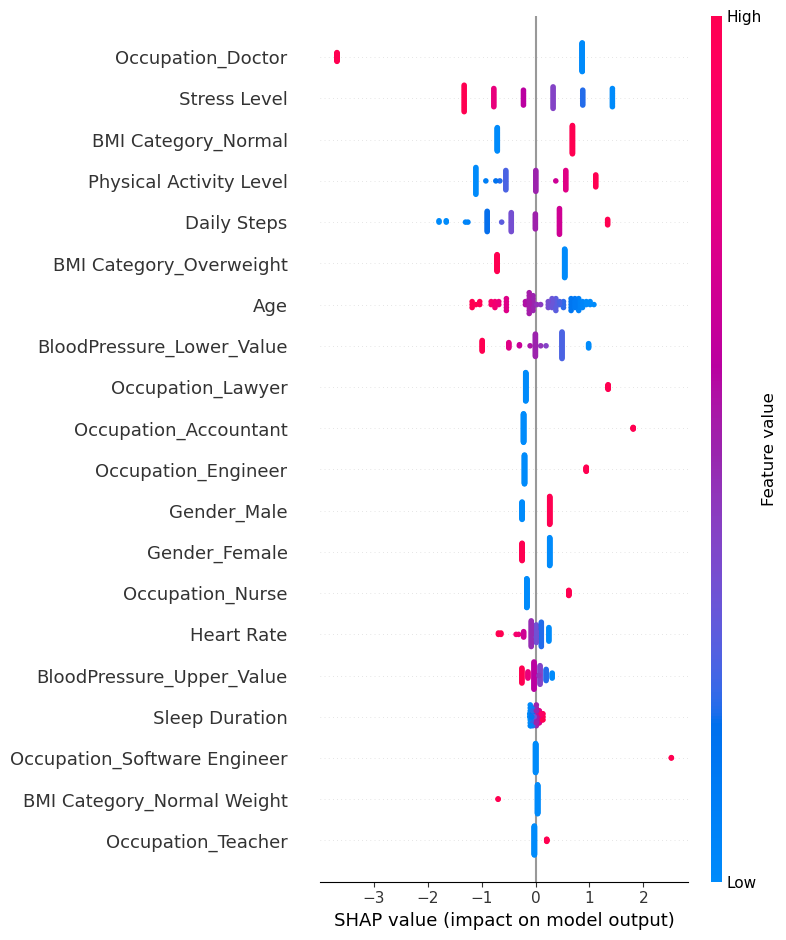

Class 5:


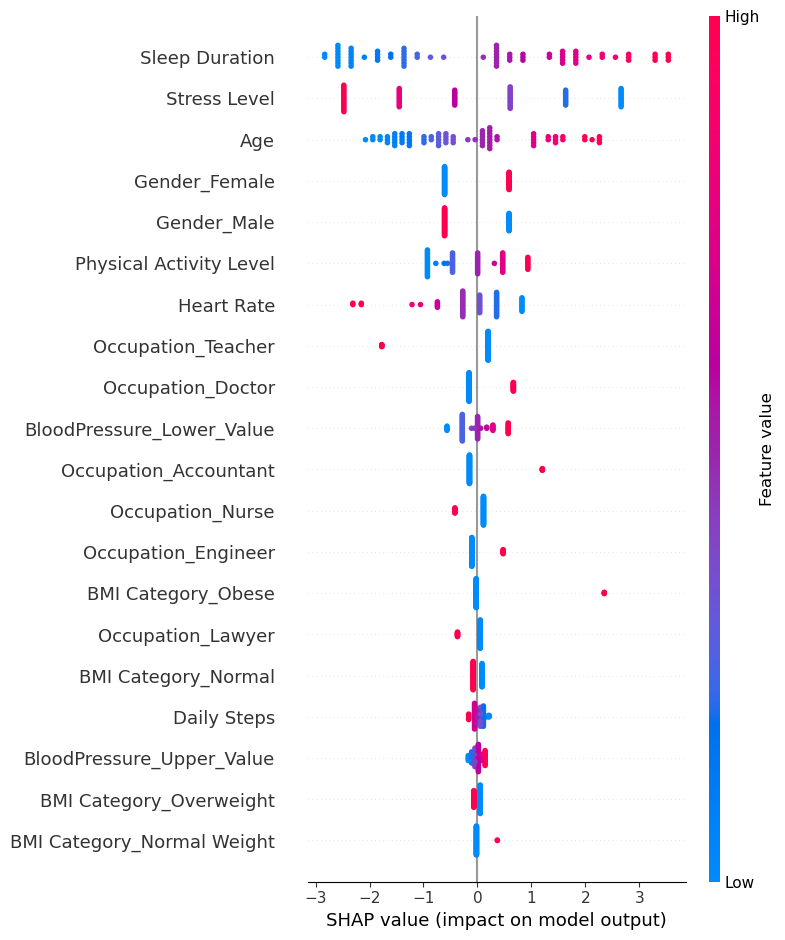

In [33]:
# Create the SHAP Explainer
explainer = shap.Explainer(logreg_pipeline.named_steps['logisticregression'], logreg_pipeline.named_steps['standardscaler'].transform(X_train))

# Calculate SHAP values
shap_values = explainer(logreg_pipeline.named_steps['standardscaler'].transform(X_test))

print("Shape of SHAP values:", shap_values.values.shape)

# Visualize the SHAP values (summary plot)
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


for class_index in range(logreg_model.classes_.shape[0]):
    print(f"Class {class_index}:")
    shap.summary_plot(shap_values[:, :, class_index], X_test, feature_names=feature_names)


### QUESTION2:Fit a tree-based model and interpret the nodes

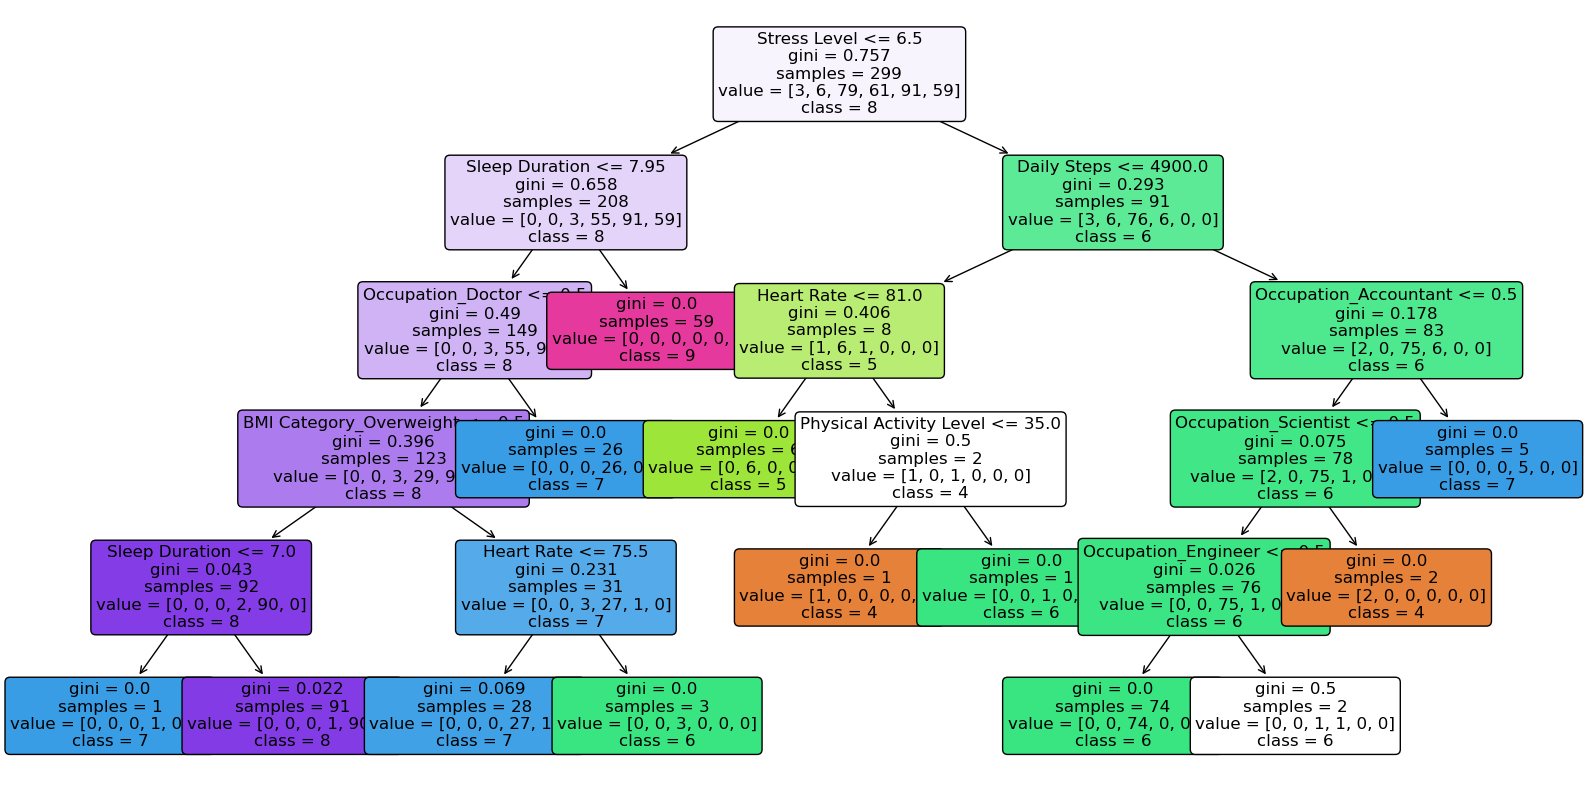

Decision Tree Accuracy: 0.9733333333333334


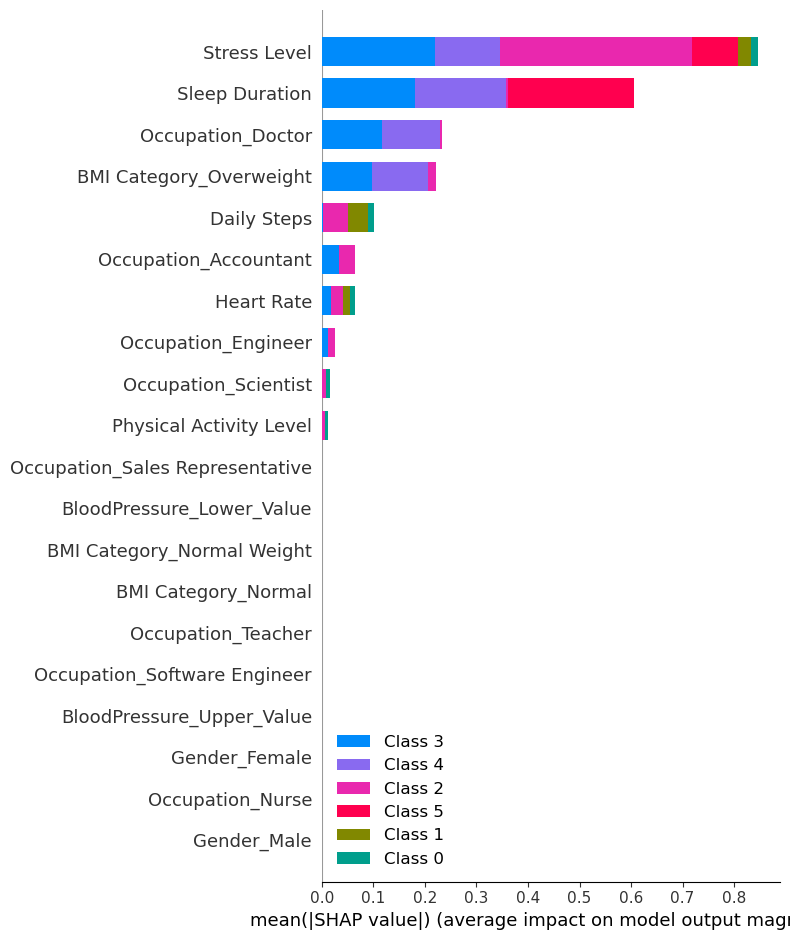

Class 0:


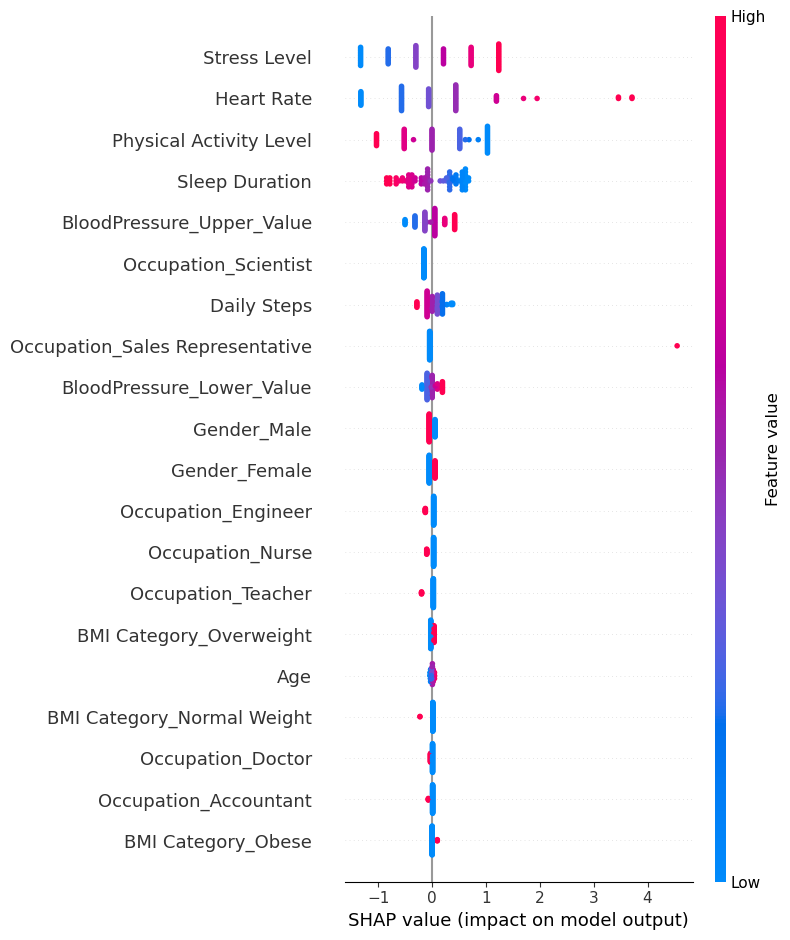

Class 1:


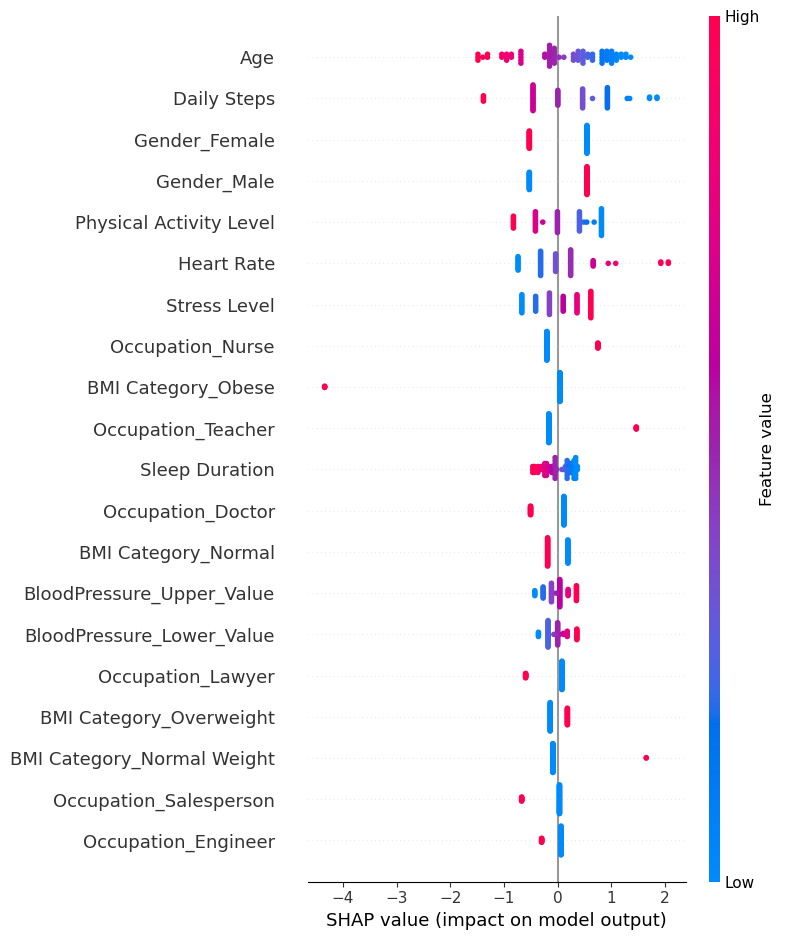

Class 2:


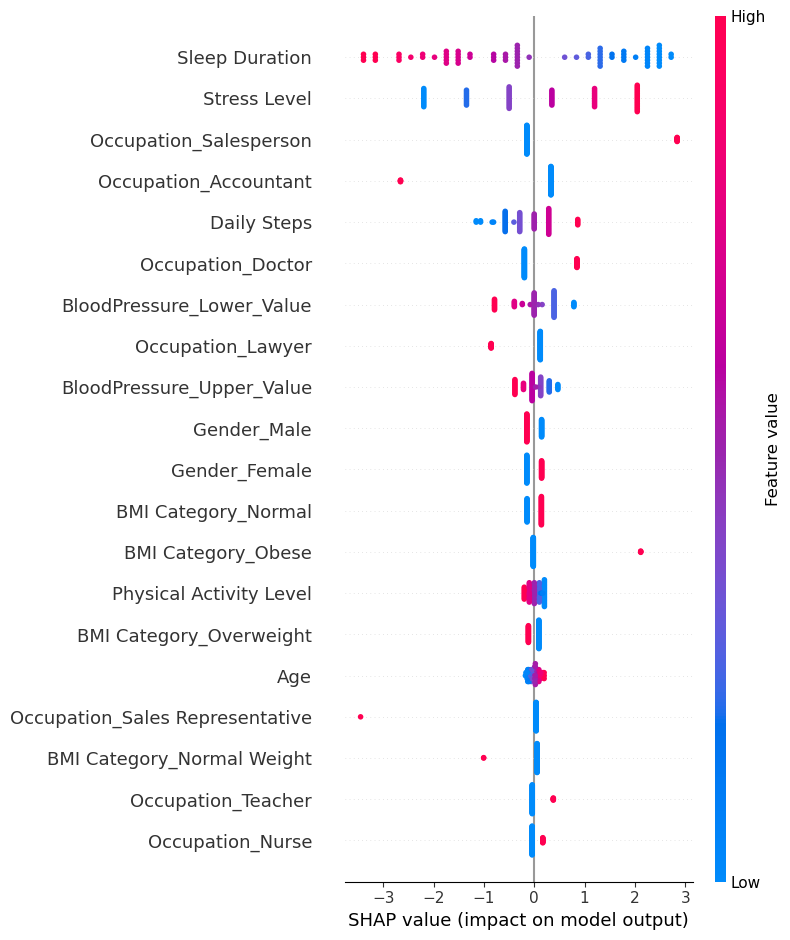

Class 3:


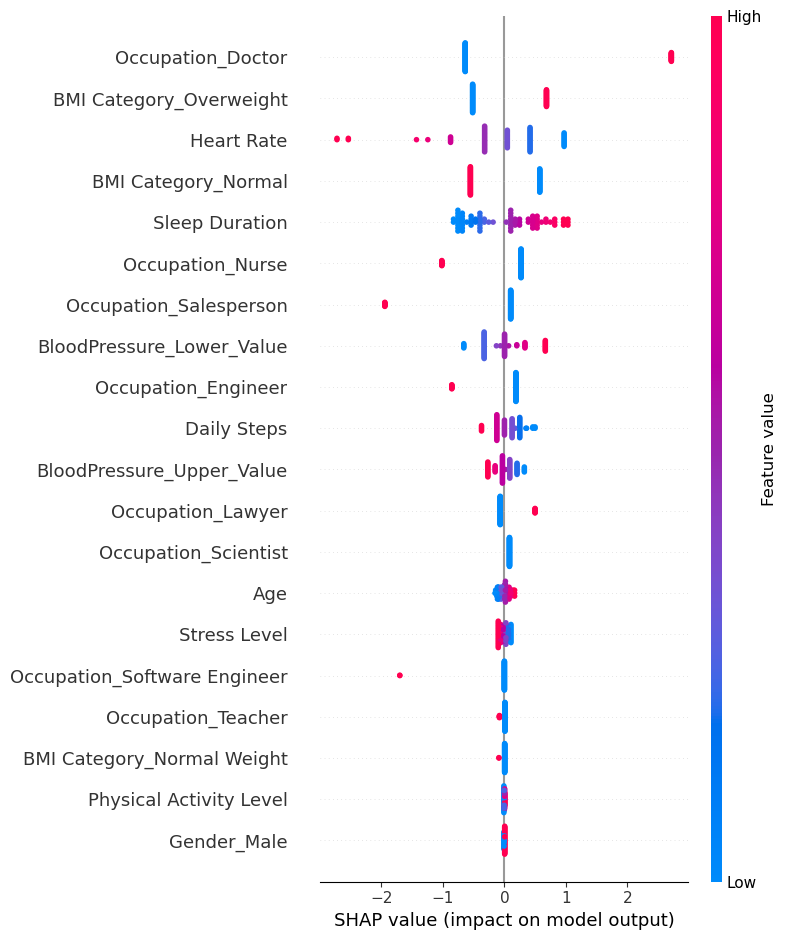

Class 4:


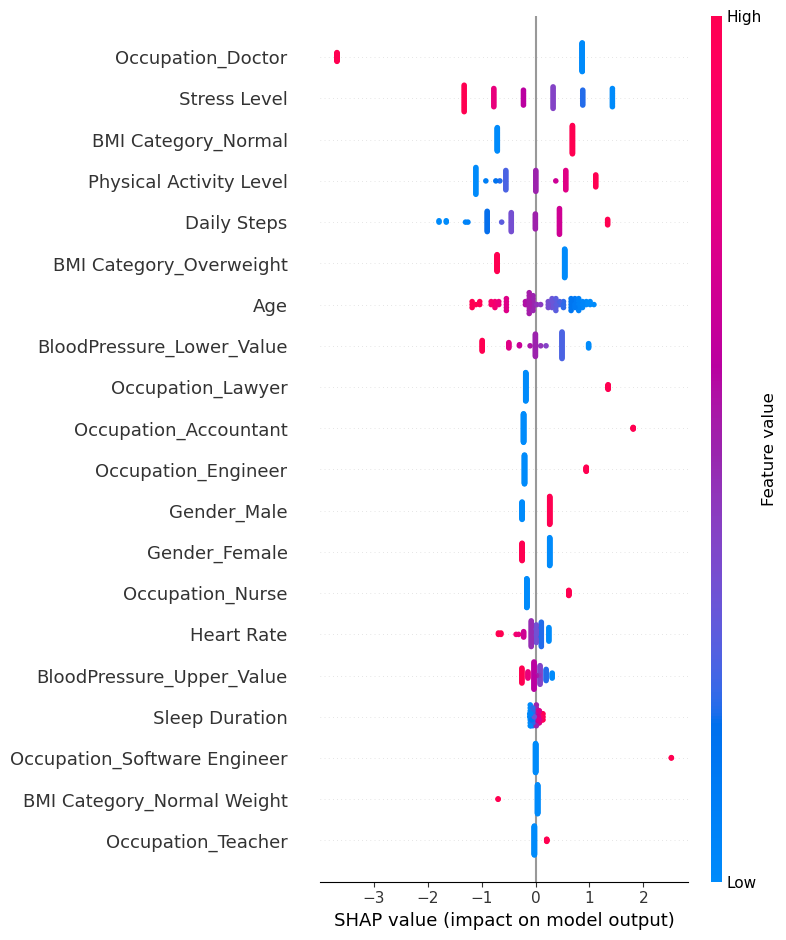

Class 5:


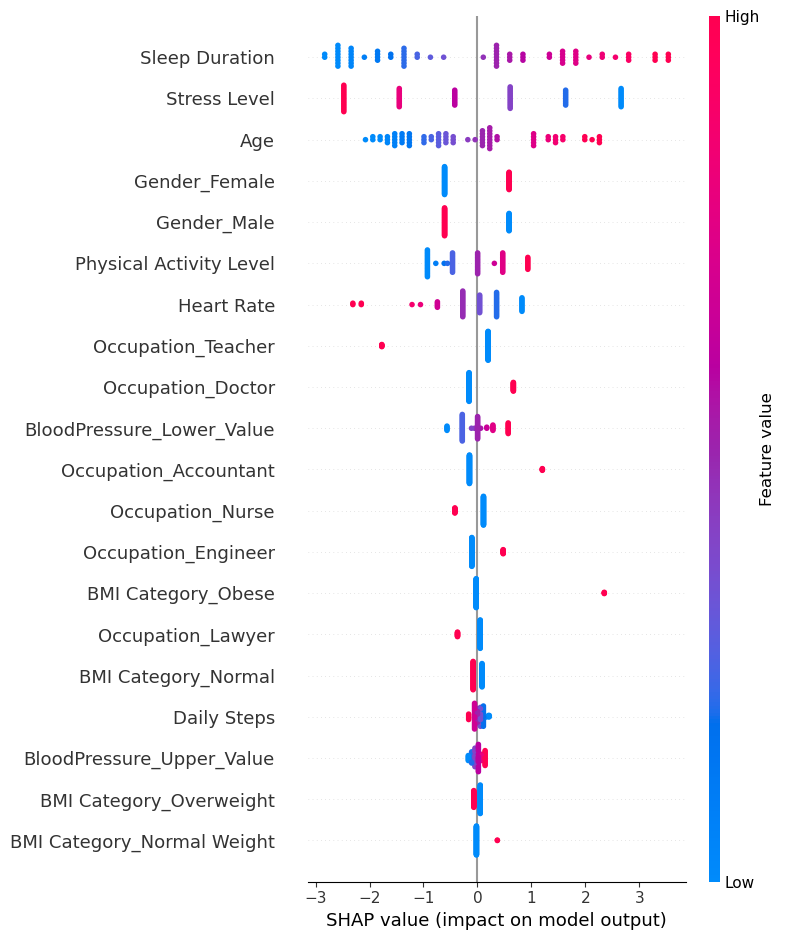

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limiting tree depth for easier visualization

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=[str(cls) for cls in dt_classifier.classes_], rounded=True, fontsize=12)
plt.show()

# Print the accuracy
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Create a SHAP TreeExplainer for the Decision Tree model
explainer_dt = shap.TreeExplainer(dt_classifier)

# Calculate SHAP values for the test set
shap_values_dt = explainer_dt.shap_values(X_test)

# Plot the SHAP values for the first instance in the test set
shap.initjs()  # Necessary for SHAP plots in Jupyter notebooks or JupyterLab
# For multi-class classification, you would have multiple arrays of SHAP values, one for each class.
# You need to choose the class for which you want to plot the SHAP values.
# Below, we are choosing class 1, but you'll need to adjust this based on your specific model and classes.
shap.force_plot(explainer_dt.expected_value[1], shap_values_dt[1][0,:], feature_names=X_test.columns.tolist())

#summary plot for all test instances
shap.summary_plot(shap_values_dt, X_test, feature_names=X_test.columns.tolist())

for class_index in range(dt_classifier.classes_.shape[0]):
    print(f"Class {class_index}:")
    shap.summary_plot(shap_values[:, :, class_index], X_test, feature_names=feature_names)


To address the task of fitting a tree-based model and interpreting the nodes, a decision tree classifier was employed. The tree begins with the root node where the first and most significant split is made based on the "Stress Level" feature. This suggests that stress level is a key factor in predicting sleep quality.

Each node in the tree includes several pieces of information:

Gini Index: It is a metric that quantifies the purity of the node. A Gini index close to 0 indicates a pure node, which means the samples in the node predominantly belong to the same class.
Samples: The count of observations within the node.
Value: The distribution of these observations across the different classes of the target variable.
Class: The class that would be predicted if the decision process were to end at that node.

As the decision tree branches out:
Splits on features such as "Occupation", "BMI Category", and "Heart Rate" indicate their influence on the outcome variable.
The path from the root to a leaf represents a set of rules that culminate in a classification based on the most frequent class in that leaf.
The leaf nodes signify the end of the decision path. The class with the majority in a leaf node's value array is taken as the predicted class for observations falling into that leaf.

The decision tree's accuracy was found to be approximately 97.33%, indicating high effectiveness on the dataset used. However, it is essential to consider the potential for overfitting and evaluate the tree's performance on an independent test set to ensure the model's generalizability.

In summary, the tree-based model uses hierarchical decision-making to segment the population into increasingly homogeneous groups with respect to the target variable, "Quality of Sleep". Each node's split is determined by the feature that best separates the classes at that point, with the ultimate goal of achieving clear and distinct predictions at the leaves.

The SHAP (SHapley Additive exPlanations) values in the provided bar chart represent the average impact each feature has on the model output magnitude across different predicted classes. Each bar color corresponds to a different class, indicating the relative influence of that feature on predicting each specific class.

Stress Level appears to have the most significant impact on model predictions. The magnitude of SHAP values suggests it is an important predictor for several classes. High stress levels might negatively impact sleep quality, which could be why it's so influential.

Sleep Duration is another critical feature. It's intuitive that sleep duration would greatly affect sleep quality classifications.
Occupation, particularly "Doctor" and "Accountant", seems to have a considerable effect. This might indicate specific sleep quality trends associated with these professions, potentially due to stress or work hours related to these jobs.

The BMI Categories ('Overweight', 'Normal Weight', and 'Normal') and various Occupations influence the prediction but to a lesser degree than Stress Level and Sleep Duration. This subtler influence could suggest that while these factors are relevant, they might be secondary to more dominant factors like stress and sleep duration.

Heart Rate and Daily Steps also contribute to the model's predictions, which aligns with general knowledge that exercise and heart health can impact sleep quality.

Blood Pressure Values show relatively lower impact, indicating they may not be as strong predictors compared to other features in the context of this model and dataset.
Gender is present but seems to have the least impact among the features listed, which may suggest that gender is not a major differentiator for sleep quality in this analysis or that its effect is captured by other variables.

Random Forest Accuracy: 1.0


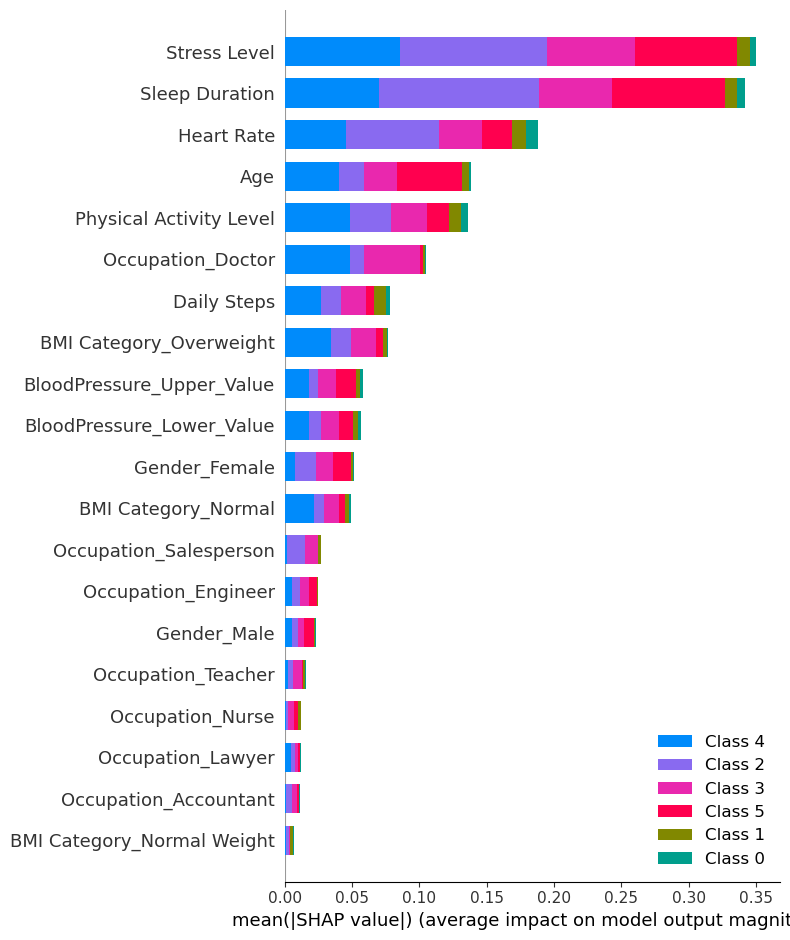

In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import shap
from sklearn.model_selection import train_test_split

# Assuming 'df3' is already loaded and preprocessed in your environment

# Define features (X) and target variable (y)
X = df3.drop(['Person ID', 'Quality of Sleep'], axis=1)
y = df3['Quality of Sleep']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

# Fit the Random Forest Classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate the accuracy of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Initialize the SHAP Explainer using a tree explainer which is optimized for tree-based models like Random Forest
explainer_rf = shap.TreeExplainer(rf_classifier)

# Calculate SHAP values for the test set
shap_values_rf = explainer_rf.shap_values(X_test)

# Summarize the SHAP values in a plot (e.g., summary plot for all test instances)
shap.summary_plot(shap_values_rf, X_test, feature_names=X_train.columns)


### QUESTION3:Use auto ml to find the best model

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,8 hours 15 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months and 26 days
H2O_cluster_name:,H2O_from_python_diviyabharrathi_mue6d0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.586 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:48:00.149: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     rmse        mse        mae      rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_5_20240317_204800  0.156325  0.0244374  0.0490622  0.0225998                 0.0244374
GBM_2_AutoML_5_20240317_204800                           0.162047  0.0262591  0.0506913  0.0233513                 0.0262591
GBM_4_AutoML_5_20240317_204800                           0.166798  0.0278217  0.0510935  0.0239011                 0.0278217
StackedEnsemble_AllModels_1_AutoML_5_20240317_204800     0.167804  0.0281582  0.055048   0.0243155                 0.0281582
GBM_grid_1_AutoML_5_20240317_204800_model_1              0.170398  0.0290355  0.0405406  0.02336                   0.02903

converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).


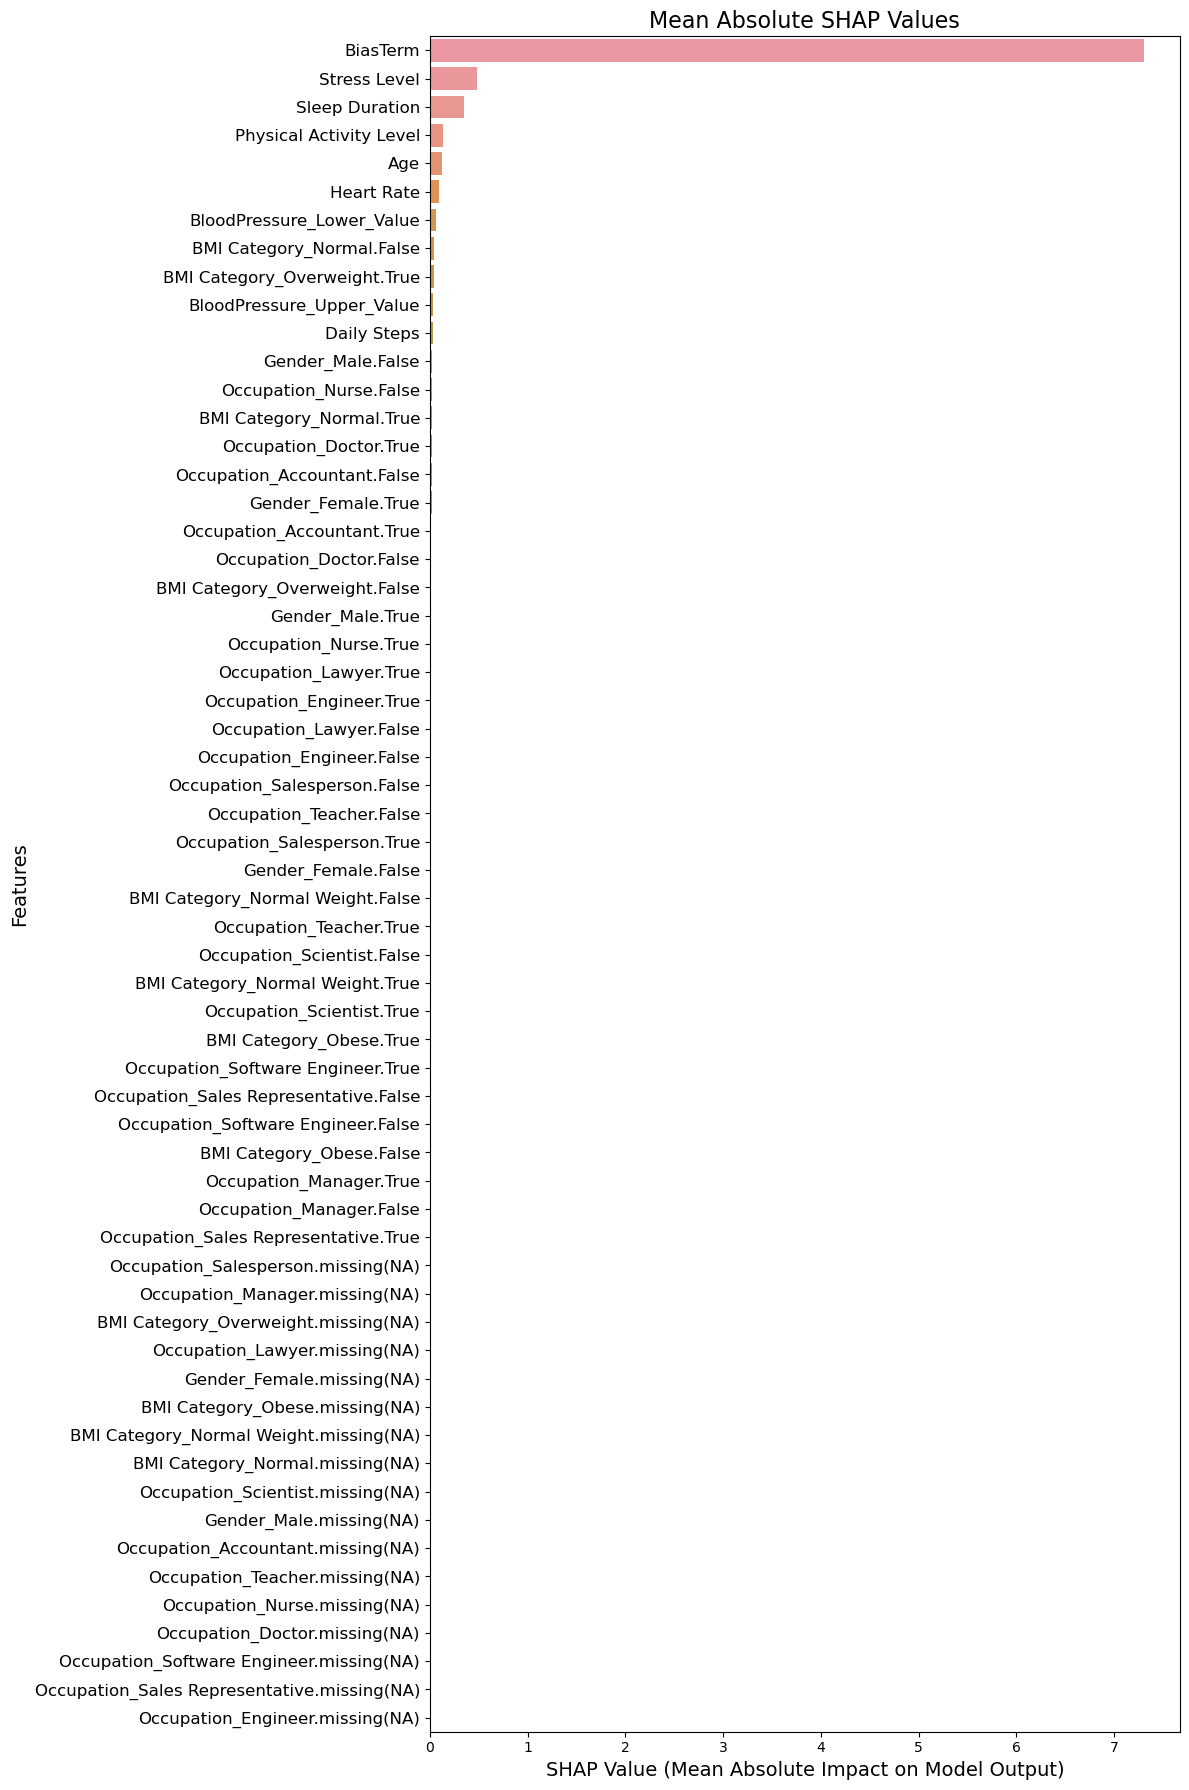

In [29]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the H2O cluster
h2o.init()

# Convert the pandas DataFrame to an H2O Frame
hf = h2o.H2OFrame(df3)

# Specify the target and predictors
target = 'Quality of Sleep'
predictors = hf.columns
predictors.remove(target)
predictors.remove('Person ID')  # Remove the 'Person ID' since it's just an identifier

# Split the data into training and testing sets
train, test = hf.split_frame(ratios=[.8], seed=42)

# Run H2O AutoML
aml = H2OAutoML(max_models=20, seed=42, max_runtime_secs=500)
aml.train(x=predictors, y=target, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb)

# The leader model is the model with the best performance on the leaderboard
leader_model = aml.leader

# Make predictions on the test set
predictions = leader_model.predict(test)


# The leader model is the model with the best performance on the leaderboard
#leader_model = aml.leader

# Choose a reasonable size for the background_frame, e.g., 10% of the training set, with a maximum of 500 rows
background_frame = train if train.nrows < 500 else train[0:500, :]

# Calculate SHAP values with the background frame
shap_values_h2o = leader_model.predict_contributions(test, background_frame=background_frame)

# Convert the H2O Frame with SHAP values to a pandas DataFrame for easier manipulation
shap_values_df = h2o.as_list(shap_values_h2o)

# Drop the column for the model prediction if present (typically named 'predict' or similar)
if 'predict' in shap_values_df.columns:
    shap_values_df = shap_values_df.drop(['predict'], axis=1)

# Calculate the mean absolute SHAP value for each feature
mean_abs_shap_values = shap_values_df.abs().mean().sort_values(ascending=False)

plt.figure(figsize=(12, 18))  # Increase the figure size for better clarity
sns.barplot(x=mean_abs_shap_values.values, y=mean_abs_shap_values.index)
plt.title('Mean Absolute SHAP Values', fontsize=16)
plt.xlabel('SHAP Value (Mean Absolute Impact on Model Output)', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Rotate the feature names for better readability
plt.yticks(rotation=0, fontsize=12)  # Keep the feature names horizontal or adjust as needed

# Adjust the layout and show the plot with adjustments
plt.tight_layout()
plt.show()

rmse (Root Mean Square Error): This is a measure of the average magnitude of the errors between the predictions and the actual values. A lower RMSE indicates a better fit.
mse (Mean Squared Error): This is similar to RMSE but squared. MSE gives more weight to larger errors due to the squaring term.
mae (Mean Absolute Error): This measures the average absolute difference between predicted values and actual values. Like RMSE, a lower value indicates a better model but is less sensitive to outliers than RMSE.
rmsle (Root Mean Squared Logarithmic Error): This is similar to RMSE but uses the logarithm of the predictions and actual values. It’s particularly useful when you want to penalize underestimates more than overestimates.
mean_residual_deviance: This is the mean of the squared deviations of the predictions from the actual values. It’s another measure of the model's accuracy, where a lower value indicates a better model.

To find the best model, look for the one with the lowest error metrics. In many cases, RMSE or MAE is used as the primary criterion for model selection because they are easily interpretable and directly related to the model's predictive accuracy.

In our table, the StackedEnsemble_BestOfFamily_1_AutoML_5_20240317_204800 model appears to have the lowest RMSE, which could make it the best model out of the ones listed, assuming all other factors are equal. Stacked ensembles often perform well because they combine predictions from several base learners.

The SHAP values indicate the impact of each feature on the model's prediction. 

Bias Term: This value represents the baseline or the average prediction of the model without any feature effects. It's where the SHAP value explanation starts.

Stress Level: This feature seems to have the highest impact on the model's output. The larger mean absolute SHAP value suggests that "Stress Level" has a significant influence on the prediction of "Quality of Sleep." A higher SHAP value for "Stress Level" could indicate that higher stress levels are likely associated with poorer sleep quality.

Sleep Duration: This is the second most influential feature. The direction of the SHAP value (positive or negative) would tell you whether longer or shorter sleep durations are influencing the sleep quality predictions in a particular direction.

Physical Activity Level: Similar to "Sleep Duration," this feature has an impact on the model predictions. Depending on the sign of the SHAP value, increased physical activity might be associated with better or worse sleep quality.

Age: Appears to have a smaller, yet meaningful, influence on the model's predictions.

Heart Rate: Its impact is less than "Age" but still considered in the model's predictions.

Blood Pressure (Lower and Upper Values), BMI Categories: These features contribute to the prediction to varying degrees. The direction and magnitude of their SHAP values would provide more insights into how each one affects sleep quality.

### Question4: Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

Understanding Model Interpretability 
In our comparison of model interpretability using SHAP values, we focused on logistic regression, decision trees, and AutoML.

Logistic Regression:

Interpretation is mathematical, assessing how feature weights affect outcome odds after a logistic transformation. This can be less transparent due to the non-linear nature of the logistic function.
SHAP values illustrate the magnitude and direction of each feature's impact but require a deeper statistical understanding to fully interpret.
This interpretation is less intuitive because it's not rule-based and requires understanding the mathematical relationship between feature values and probabilities.

Decision Trees:

They provide clear, rule-based interpretations; if a feature's value crosses a threshold, it leads to a clear outcome, easily visualized in the tree's branches.
The SHAP values reinforce the interpretability by offering visual explanations of how features at each node influence the final prediction.
Stability in feature importance wasn't measured quantitatively, but the model's simplicity generally suggests consistency.

AutoML:

Likely achieved superior predictive performance, encapsulating complex algorithms and feature engineering.
Interpretability was less straightforward due to the ensemble nature of the model, often considered a "black box."
SHAP analysis helped in uncovering the influence of features on predictions, though understanding the interactions and compounded effects can be challenging.

Across All Models:

Stress level was a consistently significant feature, implying its strong and reliable influence on sleep quality across different modeling approaches.
This uniformity in feature importance suggests that stress level is a critical factor to consider in sleep-related studies or interventions.

Conclusion:

Our investigation highlights the trade-offs between performance and interpretability. AutoML models, which can encapsulate more complex algorithms, likely delivered better predictive performance but with less obvious interpretability due to their "black box" nature. The SHAP values of the logistic regression highlighted a variety of influential features and their effects, but interpreting these effects requires a more technical understanding compared to the clear and hierarchical structure of the decision tree. In summary, Decision trees are highly interpretable but may sacrifice performance, logistic regression offers detailed insights with moderate complexity, and AutoML might provide the best performance with less interpretability. The final model choice should align with the specific interpretability requirements and performance needs of the application.

References

W3schools 

H2o ai documentation

aiskunk samples

MIT License

Copyright (c) 2024 Divi1393

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.